## 1 Problem Definition

simulation of games of bingo!

**RULES:** Each of you get a card. I call out numbers randomly between 1 and 90. If I call a number on your card, you mark it.

**WINNER:** At the end of the game, if a player has filled any row, column or diagonal, they are a winner.

**GOAL:** How should I structure my game such that there should be 50 winners at the end of the game?

**Parameters & Assumptions**

- How many players are playing?
- How many calls are we making in the game?
- When making calls, we randomly sample numbers between 1 and 90 without repeating.

## 2 Generate Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

bingo_numbers = np.arange(1, 91)
NUM_PLAYERS = 500

# Generate random non-repeating numbers on a 5x5 grid
boards = []
for player in range(NUM_PLAYERS):
    board = np.random.choice(bingo_numbers, size=(5,5), replace=False)
    boards.append(board)

In [2]:
boards[0]

array([[27, 59, 63, 89, 64],
       [10, 85, 14, 32,  8],
       [30, 31, 17,  4, 76],
       [18,  3, 67, 65, 83],
       [48, 88, 11, 29, 44]])

In [3]:
# Generate calls
NUM_CALLS = 20
calls = np.random.choice(bingo_numbers, size=(NUM_CALLS,), replace=False)

In [4]:
calls

array([61, 31, 72, 81, 49, 38, 67, 66, 74, 62, 20, 33, 88, 59, 46, 89, 53,
        1, 85,  5])

Let's break it down for a single board (index 0)

In [5]:
mask_array = np.zeros(boards[0].flatten().shape, dtype=bool)
_, x_ind, _ = np.intersect1d(boards[0], calls, return_indices=True)
x_ind = np.append(x_ind, 12) # Free space
mask_array[x_ind] = True
mask_array = mask_array.reshape(5,5)

In [6]:
mask_array

array([[False,  True, False,  True, False],
       [False,  True, False, False, False],
       [False,  True,  True, False, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False]])

In [7]:
# Determine winners from mask_array
max(
    np.max(np.sum(mask_array, axis=1)), # Rows
    np.max(np.sum(mask_array, axis=0)), # Columns
    np.sum([mask_array[i, i] for i in range(5)]), # Forward Diagonal
    np.sum([mask_array[i, 4-i] for i in range(5)]) # Backward Diagonal
)

4

## 3 Simulate

In [8]:
bingo_numbers = np.arange(1, 91)
NUM_PLAYERS = 500
NUM_CALLS = 20
winners = 0
win_counts = []
NUM_SIMULATIONS = 500

for run in range(NUM_SIMULATIONS):
    if run % 100 == 0:
        print(f"Running Simulation {run}...")

    # Generate random non-repeating numbers on a 5x5 grid
    boards = []
    for player in range(NUM_PLAYERS):
        board = np.random.choice(bingo_numbers, size=(5,5), replace=False)
        boards.append(board)

    # Generate calls
    calls = np.random.choice(bingo_numbers, size=(NUM_CALLS,), replace=False)

    winners = 0
    for player in range(NUM_PLAYERS):
        # Generate Marked Bingoboards
        mask_array = np.zeros(boards[player].flatten().shape, dtype=bool)
        _, x_ind, _ = np.intersect1d(boards[player], calls, return_indices=True)
        x_ind = np.append(x_ind, 12) # Free space
        mask_array[x_ind] = True
        mask_array = mask_array.reshape(5,5)

        # Determine winners from mask_array
        max_score = max(
            np.max(np.sum(mask_array, axis=1)),
            np.max(np.sum(mask_array, axis=0)),
            np.sum([mask_array[i, i] for i in range(5)]),
            np.sum([mask_array[i, 4-i] for i in range(5)])
        )

        if max_score == 5:
            winners += 1
    win_counts.append(winners)

Running Simulation 0...
Running Simulation 100...
Running Simulation 200...
Running Simulation 300...
Running Simulation 400...


In [9]:
mean_win_percentage = []
for i in range(NUM_SIMULATIONS):
    mean_win_percentage.append({'num_simulations': i, 'win_perc': np.mean(win_counts[:i+1]) * 100 / NUM_PLAYERS})
mean_win_percentage_df = pd.DataFrame(mean_win_percentage)

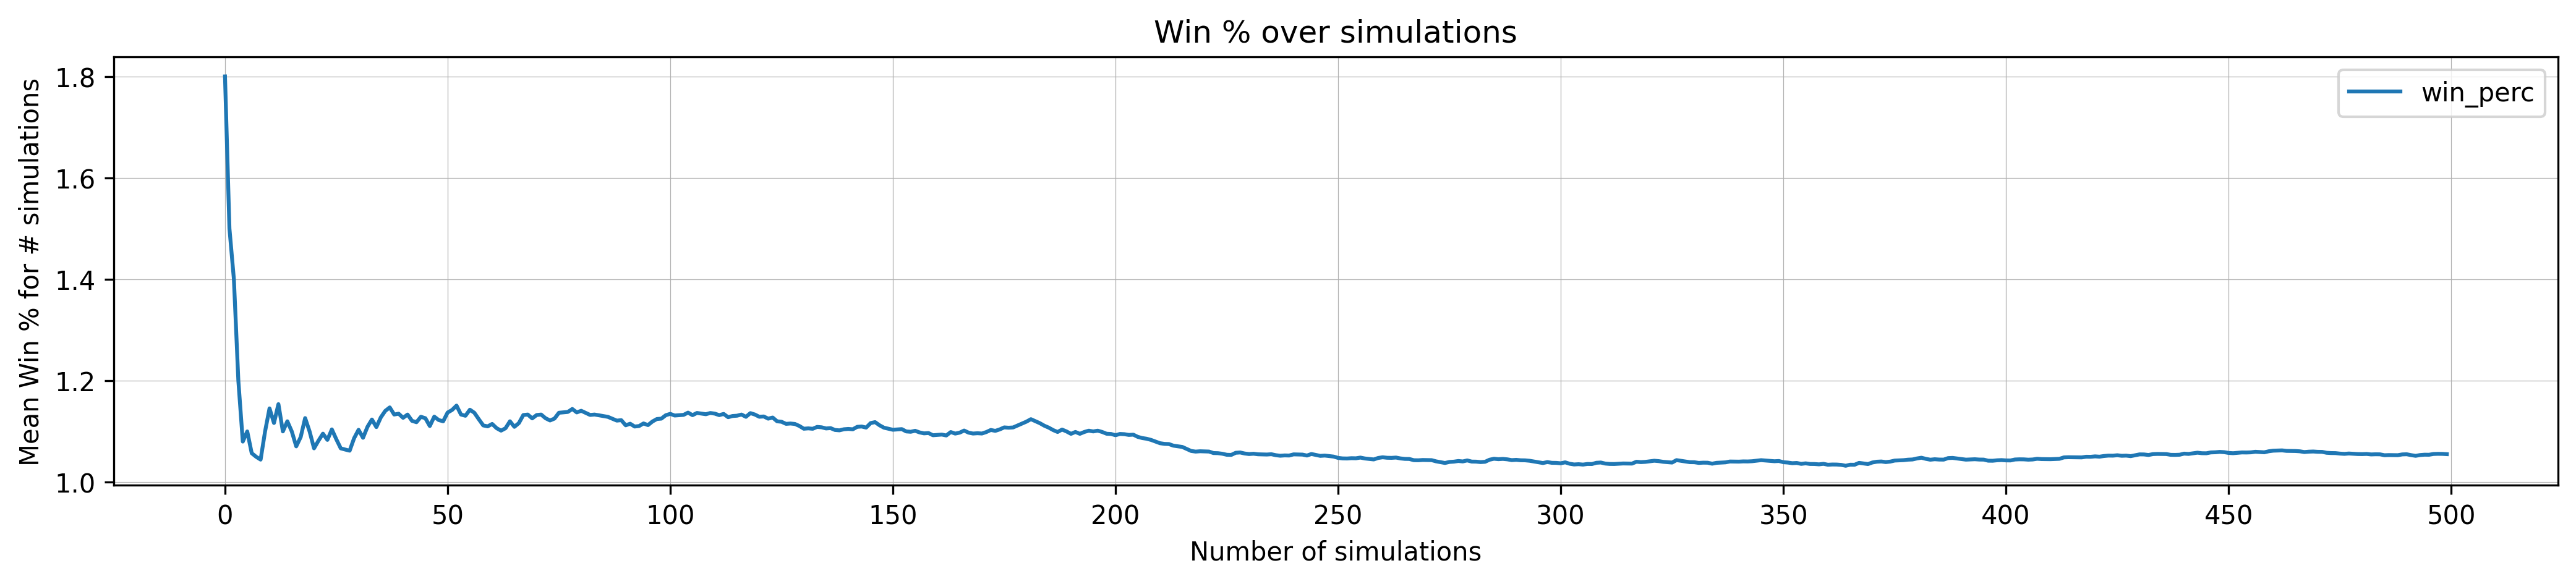

In [17]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
fig, ax = plt.subplots()
mean_win_percentage_df.plot(x='num_simulations', y='win_perc', ax=ax)
ax.set_title("Win % over simulations")
ax.set_ylabel("Mean Win % for # simulations")
ax.set_xlabel("Number of simulations")
plt.xticks(np.arange(mean_win_percentage_df['num_simulations'].min(),
                     mean_win_percentage_df['num_simulations'].max()+2,
                     50))
plt.grid(linestyle='-', linewidth=0.3)

In [11]:
num_simulations = mean_win_percentage_df['num_simulations'].iloc[-1]
win_percentage = mean_win_percentage_df['win_perc'].iloc[-1]
num_winners = round(win_percentage * NUM_PLAYERS / 100)
print(f"Win % over after {num_simulations+1} simulations = {win_percentage}% ({num_winners} winners)")

Win % over after 500 simulations = 1.0552000000000001% (5 winners)


## 4 Sensitivity

Vary the number of calls and see how win percentage changes

In [12]:
bingo_numbers = np.arange(1, 91)
NUM_PLAYERS = 500
NUM_CALLS = 50
winners = 0
win_counts = []
NUM_SIMULATIONS = 500

for run in range(NUM_SIMULATIONS):
    if run % 100 == 0:
        print(f"Running Simulation {run}...")

    # Generate random non-repeating numbers on a 5x5 grid
    boards = []
    for player in range(NUM_PLAYERS):
        board = np.random.choice(bingo_numbers, size=(5,5), replace=False)
        boards.append(board)

    # Generate all calls
    calls = np.random.choice(bingo_numbers, size=(NUM_CALLS,), replace=False)

    winners = 0
    for call_count in range(5, NUM_CALLS, 5):
        current_calls = calls[:call_count]
        for player in range(NUM_PLAYERS):
            # Generate Marked Bingoboards
            mask_array = np.zeros(boards[player].flatten().shape, dtype=bool)
            _, x_ind, _ = np.intersect1d(boards[player], current_calls, return_indices=True)
            x_ind = np.append(x_ind, 12) # Free space
            mask_array[x_ind] = True
            mask_array = mask_array.reshape(5,5)

            # Determine winners from mask_array
            max_score = max(
                np.max(np.sum(mask_array, axis=1)),
                np.max(np.sum(mask_array, axis=0)),
                np.sum([mask_array[i, i] for i in range(5)]),
                np.sum([mask_array[i, 4-i] for i in range(5)])
            )

            if max_score == 5:
                winners += 1
        win_counts.append({'num_simulations': run, 'num_calls': call_count, 'num_winners': winners})

Running Simulation 0...
Running Simulation 100...
Running Simulation 200...
Running Simulation 300...
Running Simulation 400...


In [13]:
frame = pd.DataFrame(win_counts)
frame['win_perc'] = frame['num_winners'] * 100 / NUM_PLAYERS
win_perc_df = frame.groupby('num_calls')['win_perc'].mean().reset_index()

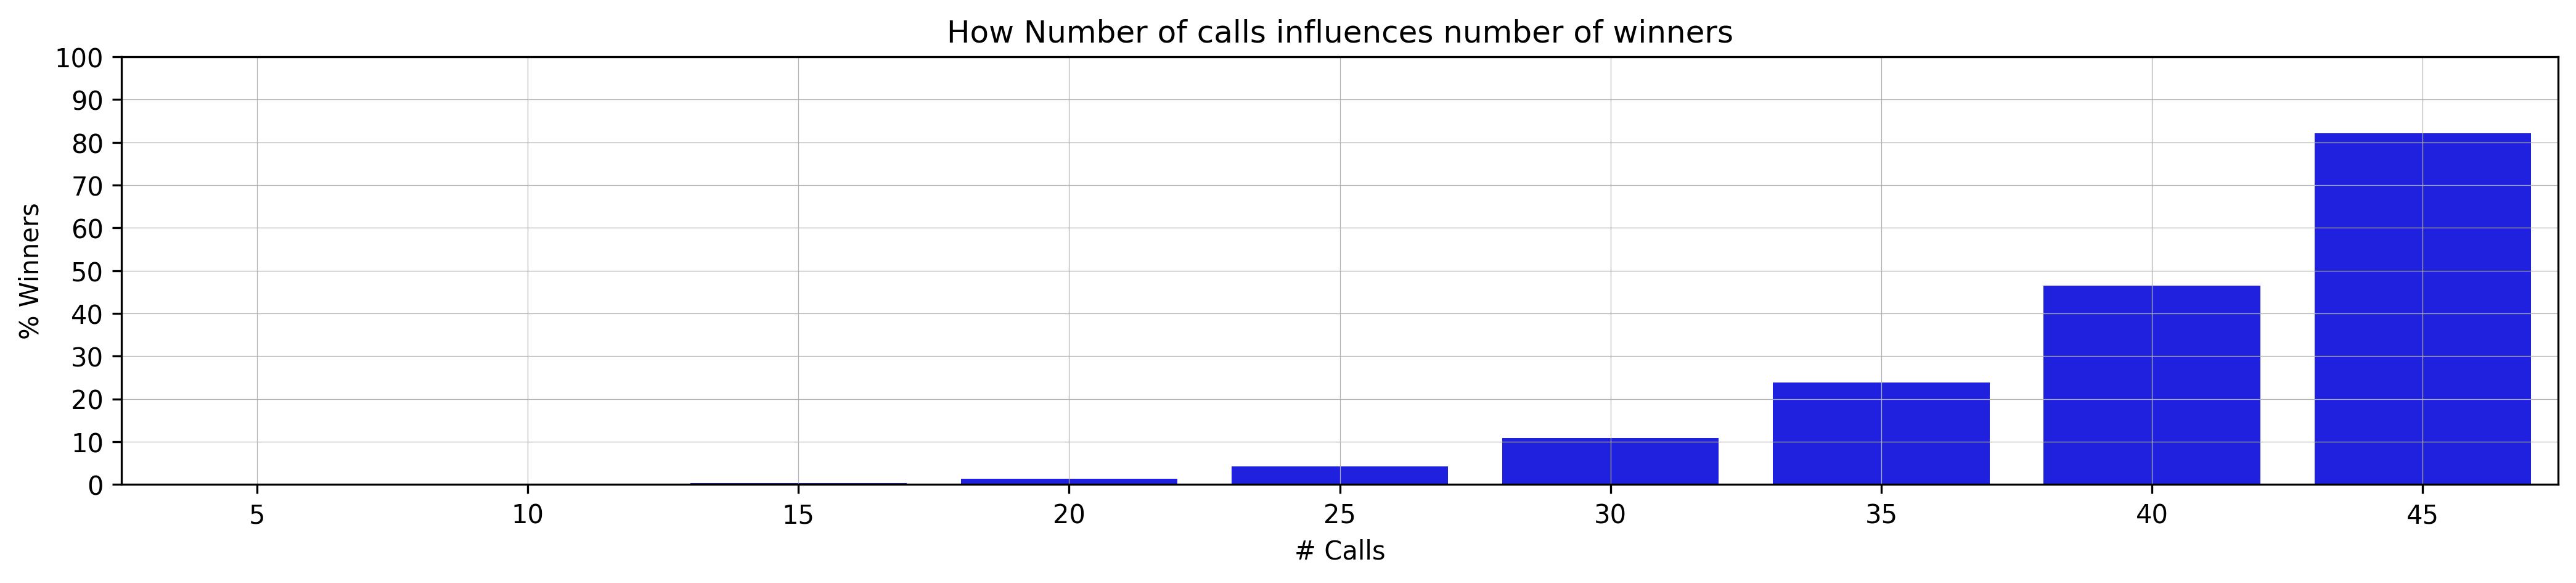

In [14]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.barplot(x='num_calls',
            y='win_perc',
            data=win_perc_df,
            color='blue',
            ax=ax)
ax.set_title('How Number of calls influences number of winners')
ax.set_xlabel('# Calls')
ax.set_ylabel('% Winners')
plt.yticks(np.arange(0,
                     101,
                     10))
plt.grid(linestyle='-', linewidth=0.3)

In [15]:
ratio = win_perc_df['win_perc'][win_perc_df['num_calls']==30].iloc[0] / win_perc_df['win_perc'][win_perc_df['num_calls']==20].iloc[0]
print(f"If we make 30 calls instead of 20 calls, the number of winners increase by {round(ratio, 2)}x")

If we make 30 calls instead of 20 calls, the number of winners increase by 8.12x


In [16]:
winner_count_30_calls = win_perc_df['win_perc'][win_perc_df['num_calls']==30].iloc[0] / 100 * NUM_PLAYERS
print(f"So if we make 30 calls, the number of winners will be around {round(winner_count_30_calls)}")

So if we make 30 calls, the number of winners will be around 54


## 5 Conclusion

- Monte Carlo Simulations it's a nice way to make approximations through trials (simulations)